# HR Analytics Employee Attrition & Performance

## Data Dictionary

|Variable|Description|
|--------|-----------|
|Age|Employee's Age|
|Attrition|Whether the employee has left the organization (Y/N)|
|BusinessTravel|Employee work-related travel frequency|
|Department|Employee's Department|
|DistanceFromHome|Employee's distance from home (in miles)|
|Education|Employee's level of education acquired|
|EducationField|Employee's field of study|
|EnvironmentSatisfaction|Employee's work environment satisfaction|
|Gender|Employee's Gender|
|JobInvolvement|Employee's involvement in work-related activities|
|JobLevel|Employee's Job Level|
|JobRole|Employee's role in organization|
|JobSatisfaction|Employee's job satisfaction rating|
|MaritalStatus|Employee's marital status|
|MonthlyIncome|Employee's monthly income|
|OverTime|Whether employee earns overtime (Y/N)|
|PercentSalaryHike|Employee salary increase rate|
|PerformanceRating|Performance rating of employee|
|RelationshipSatisfaction|Employee's relationship satisfaction rating|
|StockOptionLevel| Employee stock option level|
|TotalWorkingYears|Total number of years employee has worked|
|WorkLifeBalance|Employee's rating of balance between work commitments and home life|
|YearsAtCompany|Number of years employee has been with company|
|YearsInCurrentRole|Number of years employee has been in current position|
|YearsSinceLastPromotion|Number of years since employee has been promoted|
|YearsWithCurrManager|Number of years employee has been under their current manager|

In [37]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from matplotlib.patches import ConnectionPatch
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
import warnings 
warnings.filterwarnings('ignore')

## Data Processing

In [38]:
# Dataset
df=pd.read_csv('/Users/jaylensheard/Documents/HR-Employee-Attrition.csv')

In [39]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [40]:
df.drop(columns=['DailyRate','EmployeeCount','EmployeeNumber', 'HourlyRate', 'MonthlyRate', 'NumCompaniesWorked',
                 'StandardHours','TrainingTimesLastYear','Over18'], inplace=True)

In [41]:
for col in df.columns:
    print(col)

Age
Attrition
BusinessTravel
Department
DistanceFromHome
Education
EducationField
EnvironmentSatisfaction
Gender
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.0,25.0
PerformanceRating,1470.0,3.153741,0.360824,3.0,3.0,3.0,3.0,4.0


In [43]:
# Check for null values
def missing_cols(df):
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} : {df[col].isnull().sum()}")
    if total == 0:
        print("no null values")
            
missing_cols(df)

no null values


In [44]:
# Replace column values with resepective attributes
df['Education'] = df['Education'].replace({1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'})
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['JobInvolvement'] = df['JobInvolvement'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['JobSatisfaction'] = df['JobSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['PerformanceRating'] = df['PerformanceRating'].replace({1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'})
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['WorkLifeBalance'] = df['WorkLifeBalance'].replace({1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'})

## Exploratory Data Analysis

### Employee Demographics

In [225]:
# Gender Distribution
values = df['Gender'].value_counts().values.tolist()
labels = df['Gender'].value_counts().index.tolist()

# Pie chart attributes
colors = ["#ea5545", "#f46a9b"]
fig = go.Figure(data=go.Pie(values=values, 
                             labels=labels, hole=0.4,
                             pull=[0, 0.05],
                             marker_colors=colors))

# Update the layout
fig.update_layout(title_text='Gender Distribution', title_x=0.5, plot_bgcolor='#ffffff', 
                  font_color='#000000', height=500)

fig.show()

In [117]:
# Age Distribution
values = df['Age'].value_counts().values.tolist()
labels = df['Age'].value_counts().index.tolist()

# Histogram attributes
colors = ["#ea5545", "#f46a9b", "#ef9b20", "#edbf33", "#ede15b", "#bdcf32"]
fig = go.Figure(data=go.Histogram(x=labels, 
                                  y=values, 
                                  marker_color=colors))

# Update the layout
fig.update_layout(title_text='Age Distribution', title_x=0.5, plot_bgcolor='#ffffff',
                  font_color='#000000', height=500)
fig.update_yaxes( gridcolor='#ededed')

# Axis labels
fig.update_xaxes(title_text='Age') 
fig.update_yaxes(title_text='Count') 

fig.show()

In [91]:
# Education Distribution
values = df['Education'].value_counts().values.tolist()
labels = df['Education'].value_counts().index.tolist()

# Pie chart attributes
colors = ["#ea5545", "#f46a9b", "#ef9b20", "#edbf33", "#ede15b"]
fig = go.Figure(data=go.Pie(values=values, 
                             labels=labels,
                             marker_colors=colors))

# Update the layout
fig.update_layout(title_text='Education Distribution', title_x=0.5, plot_bgcolor='#ffffff', 
                  font_color='#000000', height=500)

fig.show()

In [132]:
# Marital Status Distribution
values = df['MaritalStatus'].value_counts().values.tolist()
labels = df['MaritalStatus'].value_counts().index.tolist()

# Bar chartattributes
colors = ["#ea5545", "#f46a9b", "#ef9b20"]
fig = go.Figure(data=go.Bar(x=labels, 
                                  y=values, 
                                  marker_color=colors))

# Update the layout
fig.update_layout(title_text='Employee Marital Status', title_x=0.5, plot_bgcolor='#ffffff',
                  font_color='#000000', height=500)
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#000000', gridcolor='#ededed')

fig.show()

### Role Demographics

In [220]:
overall_attrition = df['Attrition'].value_counts()
overall_attrition

No     1233
Yes     237
Name: Attrition, dtype: int64

In [226]:
# Overall Attrition
values = df['Attrition'].value_counts().values.tolist()
labels = df['Attrition'].value_counts().index.tolist()

# Pie chart attributes
colors = ["#ede15b", "#bdcf32"]
fig = go.Figure(data=go.Pie(values=values, 
                             labels=labels,
                             hole=0.4,
                             marker_colors=colors))

# Update the layout
fig.update_layout(title_text='Overall Attrition', title_x=0.5, plot_bgcolor='#ffffff', 
                  font_color='#000000', height=500)

fig.show()

In [234]:
# Gender Attrition Table
gender_attrition = df.groupby('Gender')['Attrition'].value_counts().unstack()

gender_attrition

Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


In [251]:
# Gender Attrition
gender_attrition = df[df['Attrition'] == 'Yes']['Gender'].value_counts(normalize=True)

# Get labels and values for the pie chart
labels = gender_attrition.index.tolist()
values = gender_attrition.tolist()

# Pie chart attributes
colors = ["#ea5545", "#f46a9b"]
fig = go.Figure(data=go.Pie(values=values, labels=labels, marker_colors=colors))

# Update the layout
fig.update_layout(title_text='Gender Attrition', title_x=0.5, plot_bgcolor='#ffffff',
                  font_color='#000000', height=500)

fig.show()

In [246]:
# Attrition by Gender and Age Group Table
age_bins = [17, 30, 40, 50, 61]
age_labels = ['17-29', '30-39', '40-49', '50-61']

# Create Age Group column
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Filtered attrition dataframe
age_gender_attrition = df.groupby(['Gender', 'Age Group'])['Attrition'].value_counts().unstack()

age_gender_attrition

Attrition          No  Yes
Gender Age Group          
Female 17-29      105   41
       30-39      221   28
       40-49      116   13
       50-61       59    5
Male   17-29      181   59
       30-39      313   57
       40-49      172   21
       50-61       66   13

In [247]:
# Attrition by Gender and Age Group

# Age Groups
plot_df = df.groupby(['Gender','Age Group'])['Attrition'].value_counts(normalize=True).unstack()

# Histogram attributes
fig = px.bar(plot_df.reset_index(), x='Age Group', y='Yes', facet_col='Gender', color='Gender', barmode='group',
                   color_discrete_map={'Male': "#ea5545", 'Female': "#f46a9b"},
                   category_orders={'Age Group': ['17-29', '30-39', '40-49', '50-61']})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

# Update the layout
fig.update_layout(title_text='Attrition by Gender and Age Group', title_x=0.5, plot_bgcolor='#ffffff', font_color='#000000',
                  xaxis=dict(type='category'), yaxis=dict(tickformat=".0%"), bargap=0.1, bargroupgap=0)
fig.for_each_xaxis(lambda y: y.update(title=''))

# Update the axes
fig.update_xaxes(showticklabels=True, col=1)
fig.update_xaxes(showticklabels=True, col=2)
fig.update_yaxes(title_text='Attrition Rate', zeroline=True, zerolinewidth=1, zerolinecolor='#000000',
                 gridcolor='#ededed', col=1)
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#000000', gridcolor='#ededed', col=2)

fig.show()


In [205]:
# Attrition by Department Table
department_attrition = df[df['Attrition'].isin(['Yes', 'No'])].groupby(['Department', 'Attrition']).size().unstack(fill_value=0)
department_attrition

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


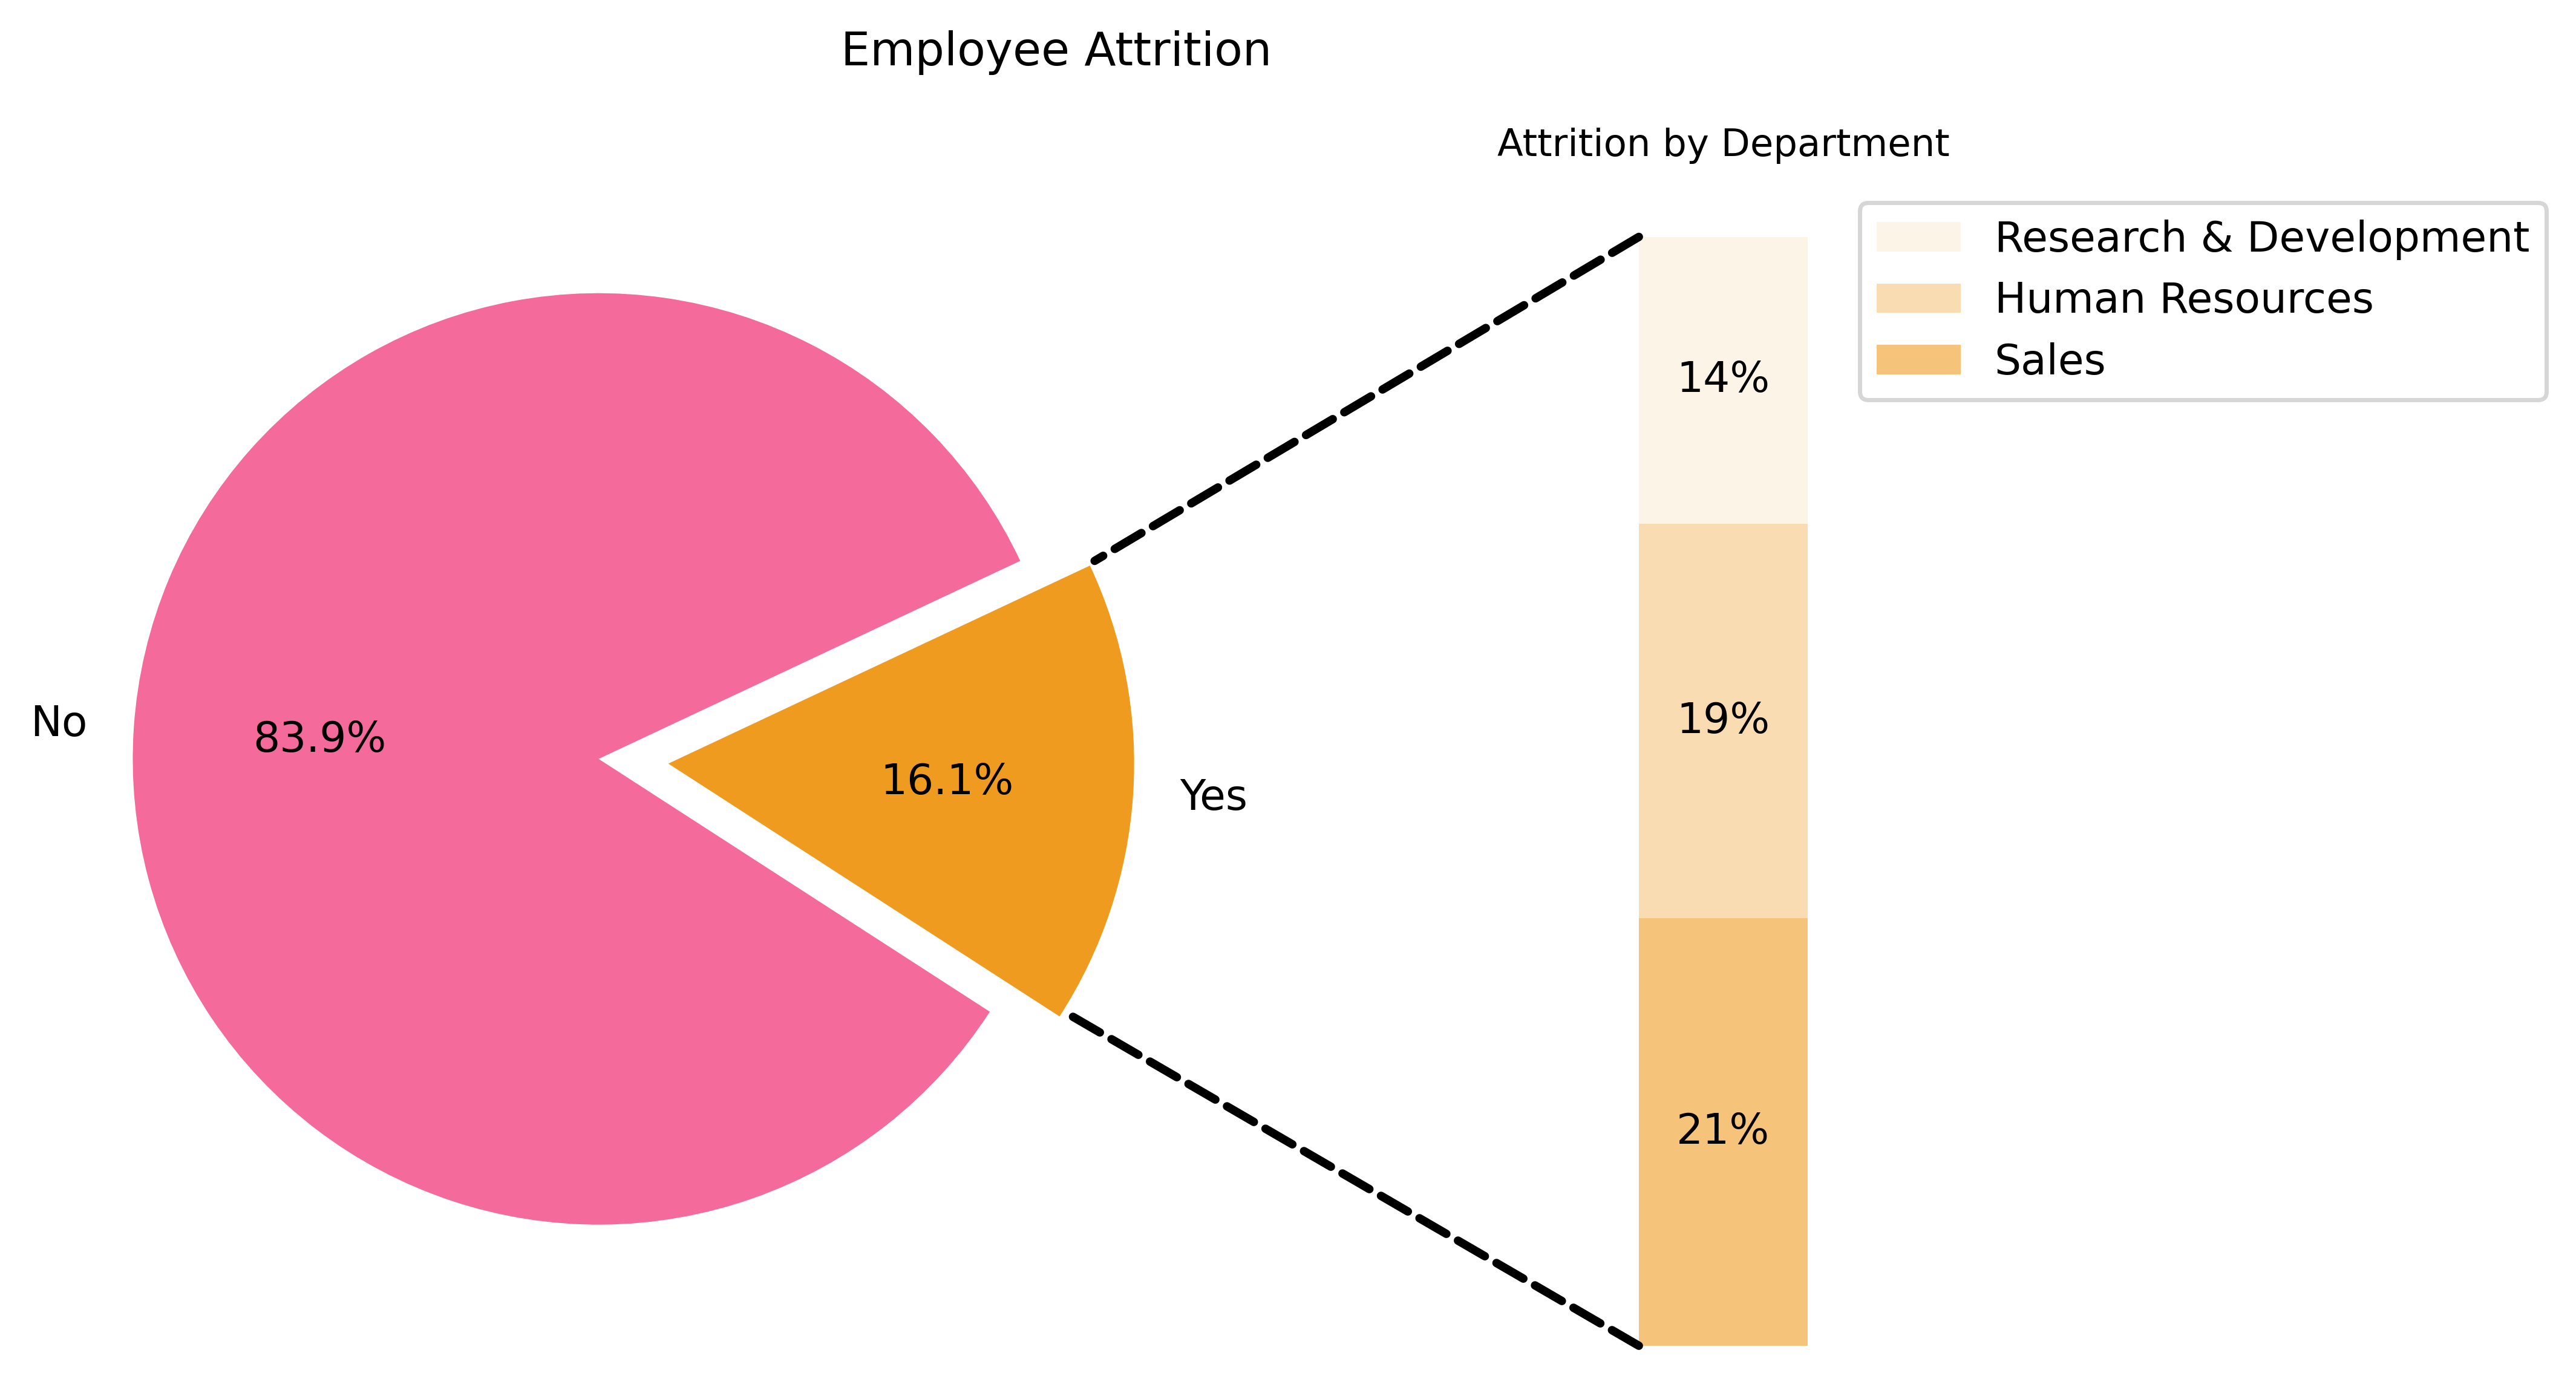

In [196]:
# Attrition by Department 
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(9,5), gridspec_kw={'width_ratios':[3, 2]})
fig.subplots_adjust(wspace=0)
fig.suptitle('Employee Attrition', fontsize=11)
fig.background_color = '#ffffff'

# Pie chart attributes
overall_ratios=df['Attrition'].value_counts(normalize=True)
labels=['No','Yes']
explode=[0.15,0]
colors=["#f46a9b", "#ef9b20"]
angle = 30 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, colors=colors)

# Bar chart attributes
department_ratios=df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack().loc[:,'Yes'].sort_values(ascending=False)
department_labels=department_ratios.index.tolist()
bottom= 1.0
width= .20
bar_colors=["#ef9b20"]

# Legend bar chart attributes
for j, (height, label) in enumerate(reversed([*zip(department_ratios, department_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color=bar_colors, label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
ax2.set_title('Attrition by Department', fontsize=9)
ax2.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
ax2.axis('off')
ax2.set_xlim(-2.5 * width, 2.5 * width)

# ConnectionPatch
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height  = sum(department_ratios)

# Bottom Connecting Line
x = r * np.cos(np.pi / 180 * theta2) + center[1]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bottom), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color('black')
con.set_linewidth(2)
con.set_linestyle('--')
ax2.add_artist(con)

# Top Connecting Line
x = r * np.cos(np.pi / 180 * theta1) + center[1]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bottom + bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color('black')
con.set_linewidth(2)
con.set_linestyle('--')
ax2.add_artist(con)

# Update Resolution
plt.rcParams['figure.dpi'] = 500
plt.rcParams['savefig.dpi'] = 500

plt.show()

In [157]:
# Attrition by Department and Gender
plot_df = df.groupby(['Gender','Department'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()

# Bar chart attributes
fig = px.bar(plot_df, x='Department', y='Percent', color='Attrition', barmode='group',
            text='Percent', facet_col='Gender', category_orders={'Attrition': ['Yes', 'No']}, 
            color_discrete_map={'Yes': "#ef9b20",'No': "#edbf33"},
            hover_data={'Gender': True, 'Department': True, 'Attrition': True, 'Percent': ':.3f'})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

# Update layout
fig.update_traces(texttemplate='%{text:.3s}%', textposition='inside', textangle=0, textfont_size=10,
                 marker_line=dict(width=0))
fig.update_layout(title_text='Attrition by Department and Gender', title_x=0.5, plot_bgcolor='#ffffff', font_color='#000000',
                  height=500, xaxis=dict(tickangle=30))              
fig.for_each_xaxis(lambda y: y.update(title=''))

# Update axes
fig.update_xaxes(showticklabels=True, tickangle=30, col=2)
fig.update_yaxes(title_text='Attrition Rate', zeroline=True, zerolinewidth=1, zerolinecolor='#000000',
                gridcolor='#ededed', col=1) 
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#000000', gridcolor='#ededed', col=2)                                        

fig.show()


In [255]:
# Attrition by Job Role Table
jobrole_attrition = df[df['Attrition'].isin(['Yes', 'No'])].groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)
jobrole_attrition['Attrition Rate'] = jobrole_attrition['Yes'] / (jobrole_attrition['Yes'] + jobrole_attrition['No']) * 100
jobrole_attrition

Attrition,No,Yes,Attrition Rate
JobRole,,,
Healthcare Representative,122,9,6.870229
Human Resources,40,12,23.076923
Laboratory Technician,197,62,23.938224
Manager,97,5,4.901961
Manufacturing Director,135,10,6.896552
Research Director,78,2,2.500000
Research Scientist,245,47,16.095890
Sales Executive,269,57,17.484663
Sales Representative,50,33,39.759036


In [265]:
# Attrition by Job Role
plot_df = df.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)
plot_df = plot_df.div(plot_df.sum(axis=1), axis=0)
plot_df.reset_index(inplace=True)

# Bar chart attributes
fig = px.bar(plot_df, x='JobRole', y=['No', 'Yes'], barmode='group',
             labels={'No': 'No Attrition', 'Yes': 'Attrition'},
             color_discrete_map={'No': "#27aeef", 'Yes': "#b33dc6"})

# Update the layout
fig.update_layout(title_text='Attrition by Job Role', title_x=0.5, plot_bgcolor='#ffffff', font_color='#000000',
                  height=500, xaxis=dict(tickangle=30))
fig.update_yaxes(title_text='Attrition Rate', zeroline=True, zerolinewidth=1, zerolinecolor='#000000',
                gridcolor='#ededed')

fig.show()


In [259]:
# Attrition by Salary and Gender Table
salary_bins = [1000, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]
salary_labels = ['$1000-$2499', '$2500-$4999', '$5000-$7499', '$7500-$9999', 
'$10000-$12499', '$12500-$14999', '$15000-$17499', '$17500-$20000']

# Create Salary Group column
df['Income Group'] = pd.cut(df['MonthlyIncome'], bins=salary_bins, labels=salary_labels)

# Filtered attrition dataframe
salary_gender_attrition = salary_gender_attrition.fillna(0).astype(int)
salary_gender_attrition['Attrition Rate'] = salary_gender_attrition['Yes'] / (salary_gender_attrition['Yes'] + salary_gender_attrition['No']) * 100


salary_gender_attrition

Attrition              No  Yes  Attrition Rate
Gender Income Group                           
Female $1000-$2499     53   25       32.051282
       $2500-$4999    175   36       17.061611
       $5000-$7499    117   10        7.874016
       $7500-$9999     40    9       18.367347
       $10000-$12499   34    3        8.108108
       $12500-$14999   30    1        3.225806
       $15000-$17499   28    0        0.000000
       $17500-$20000   24    3       11.111111
Male   $1000-$2499     96   52       35.135135
       $2500-$4999    262   50       16.025641
       $5000-$7499    163   20       10.928962
       $7500-$9999     71   10       12.345679
       $10000-$12499   42   12       22.222222
       $12500-$14999   22    4       15.384615
       $15000-$17499   24    0        0.000000
       $17500-$20000   52    2        3.703704

In [ ]:
# Attrition by Salary and Gender
